# Contents
- [Data](#data)
- [Logistic Regression Model](#log_reg)
- [Modeling](#model)
- Tuning
- Feature Analysis
- Prediction

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data <a name="data"></a>

## Load Data

In [2]:
df = pd.read_csv('data/winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# target variable classes
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

## Define Variables

In [5]:
# define predictor variables (features)
X = df.iloc[:, :-1]
# define dependent variable (target)
y = df.iloc[:, -1]

## Single Class, Single Feature

In [6]:
# create single feature dataframe
df_1 = df[['volatile acidity', 'quality']].copy()

In [7]:
# convert dataset to single class
neg_cls = df['quality'].unique()[df['quality'].unique() <= 5]
pos_cls = df['quality'].unique()[df['quality'].unique() > 5]
df_1.replace(to_replace=neg_cls, value=0, inplace=True)
df_1.replace(to_replace=pos_cls, value=1, inplace=True)

In [8]:
# modified target variable classes
df_1['quality'].unique()

array([0, 1])

In [9]:
df_1.head()

,volatile acidity,quality
0,0.70,0
1,0.88,0
2,0.76,0
3,0.28,1
4,0.70,0


### Define Variables

In [10]:
# define predictor variables (features)
X_1 = df_1.iloc[:, :-1]
# define dependent variable (target)
y_1 = df_1.iloc[:, -1]

### Plot

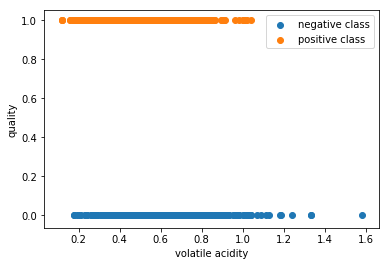

In [11]:
plt.scatter(X_1.iloc[y_1[y_1 == 0].index, :], y_1[y_1 == 0], label='negative class')
plt.scatter(X_1.iloc[y_1[y_1 == 1].index, :], y_1[y_1 == 1], label='positive class')
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend();

## Single Class, Two-Feature

In [12]:
# create two-feature dataframe
df_2 = df[['volatile acidity', 'alcohol', 'quality']].copy()

In [13]:
# convert dataset to single class
neg_cls = df['quality'].unique()[df['quality'].unique() <= 5]
pos_cls = df['quality'].unique()[df['quality'].unique() > 5]
df_2.replace(to_replace=neg_cls, value=0, inplace=True)
df_2.replace(to_replace=pos_cls, value=1, inplace=True)

In [14]:
# modified target variable classes
df_2['quality'].unique()

array([0, 1])

In [15]:
df_2.head()

,volatile acidity,alcohol,quality
0,0.70,9.4,0
1,0.88,9.8,0
2,0.76,9.8,0
3,0.28,9.8,1
4,0.70,9.4,0


### Define Variables

In [16]:
# define predictor variables (features)
X_2 = df_2.iloc[:, :-1]
# define dependent variable (target)
y_2 = df_2.iloc[:, -1]

### Plot

In [17]:
from mpl_toolkits import mplot3d

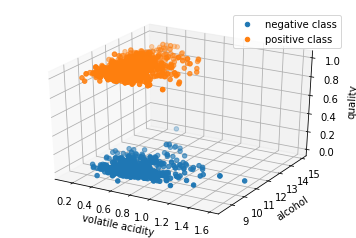

In [18]:
# uncomment for interactivity:
# %matplotlib notebook

ax = plt.axes(projection='3d')
ax.scatter3D(X_2.iloc[y_2[y_2 == 0].index, 0], X_2.iloc[y_2[y_2 == 0].index, 1], y_2[y_2 == 0], 
             label='negative class')
ax.scatter3D(X_2.iloc[y_2[y_2 == 1].index, 0], X_2.iloc[y_2[y_2 == 1].index, 1], y_2[y_2 == 1], 
             label='positive class')
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df_2.columns[-1])
ax.legend();

In [19]:
%matplotlib inline

# Logistic Regression Model <a name="log_reg"></a>
Model overview for simple cases

In [20]:
from sklearn.linear_model import LogisticRegression

## Model: Single Class, Single Feature

In [21]:
# create instance of model
log_reg = LogisticRegression()

In [22]:
# fit model on training data
log_reg.fit(X_1, y_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model Coefficients

In [23]:
# output model coefficients
log_reg.coef_

array([[-3.57431172]])

In [24]:
# output model intercept
log_reg.intercept_

array([2.02295711])

In [25]:
# output model classes
log_reg.classes_

array([0, 1])

In [26]:
# features
X_1.columns

Index(['volatile acidity'], dtype='object')

In [27]:
coefs = [log_reg.intercept_[0], log_reg.coef_[0][0]]

In [28]:
feats = ['intercept', X_1.columns[0]]

In [29]:
pd.DataFrame(coefs, index=feats, columns=['Model Coefficients'])

,Model Coefficients
intercept,2.022957
volatile acidity,-3.574312


### Model Equation

In [30]:
print('Regression Model Equation')
print('-'*80)
print(f'y = {round(log_reg.coef_[0][0], 4)}*{X_1.columns[0]} \
+ {round(log_reg.intercept_[0], 2)}')
print('-'*80)

Regression Model Equation
--------------------------------------------------------------------------------
y = -3.5743*volatile acidity + 2.02
--------------------------------------------------------------------------------


### Model Visualization

In [31]:
# calculate model values with logistic regression equation
x_mod = np.linspace(min(X_1.iloc[:, 0]), max(X_1.iloc[:, 0]))
y_mod = 1 / (1 + np.exp(-(log_reg.coef_[0][0]*x_mod + log_reg.intercept_[0])))

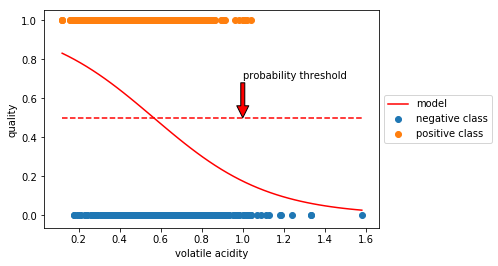

In [32]:
plt.scatter(X_1.iloc[y_1[y_1 == 0].index, :], y_1[y_1 == 0], label='negative class')
plt.scatter(X_1.iloc[y_1[y_1 == 1].index, :], y_1[y_1 == 1], label='positive class')
plt.plot(x_mod, y_mod, c='r', label='model')
plt.plot(x_mod, [0.5]*len(x_mod), c='r', linestyle='--')
plt.annotate('probability threshold', xy=(1, 0.5), xytext=(1, 0.7),
            arrowprops=dict(facecolor='red'))
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Model Predictions

In [33]:
# predict class based on feature input
predictions = log_reg.predict(X_1)
predictions

array([0, 0, 0, ..., 1, 0, 1])

In [34]:
# predict probabilities of each class based on feature input
predict_proba = log_reg.predict_proba(X_1)
predict_proba

array([[0.61752614, 0.38247386],
       [0.75444051, 0.24555949],
       [0.66674947, 0.33325053],
       ...,
       [0.45015161, 0.54984839],
       [0.57015264, 0.42984736],
       [0.28599401, 0.71400599]])

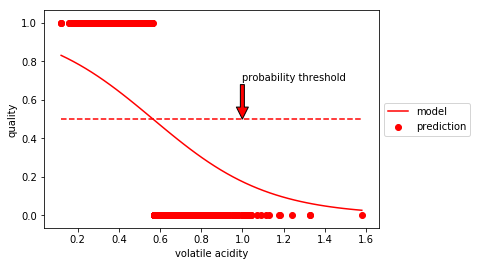

In [35]:
plt.scatter(X_1, predictions, c='r', label='prediction')
plt.plot(x_mod, y_mod, c='r', label='model')
plt.plot(x_mod, [0.5]*len(x_mod), c='r', linestyle='--')
plt.annotate('probability threshold', xy=(1, 0.5), xytext=(1, 0.7),
            arrowprops=dict(facecolor='red'))
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Model Evaluation

In [36]:
from sklearn import metrics

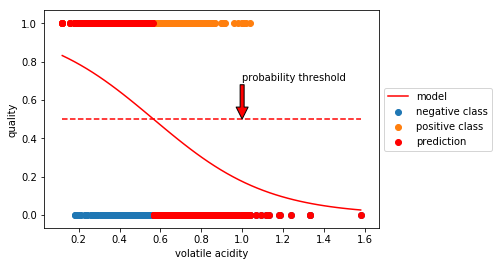

In [37]:
plt.scatter(X_1.iloc[y_1[y_1 == 0].index, :], y_1[y_1 == 0], label='negative class')
plt.scatter(X_1.iloc[y_1[y_1 == 1].index, :], y_1[y_1 == 1], label='positive class')
plt.scatter(X_1, predictions, c='r', label='prediction')
plt.plot(x_mod, y_mod, c='r', label='model')
plt.plot(x_mod, [0.5]*len(x_mod), c='r', linestyle='--')
plt.annotate('probability threshold', xy=(1, 0.5), xytext=(1, 0.7),
            arrowprops=dict(facecolor='red'))
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

#### Overall Accuracy

In [38]:
sum(predictions == y_1) / len(y_1)

0.6416510318949343

In [39]:
log_reg.score(X_1, y_1)

0.6416510318949343

#### Confusion Matrix

In [40]:
# true negatives
TN = sum((y_1 == 0) & (predictions == 0))
TN

417

In [41]:
# false positives
FP = sum((y_1 == 0) & (predictions == 1))
FP

327

In [42]:
# false negatives
FN = sum((y_1 == 1) & (predictions == 0))
FN

246

In [43]:
# true positives
TP = sum((y_1 == 1) & (predictions == 1))
TP

609

In [44]:
metrics.confusion_matrix(y_1, predictions)

array([[417, 327],
       [246, 609]])

#### Precision/Recall

In [45]:
# negative precision
TN / (TN + FN)

0.6289592760180995

In [46]:
# negative recall
TN / (TN + FP)

0.5604838709677419

In [47]:
# positive precision
TP / (TP + FP)

0.6506410256410257

In [48]:
# positive recall
TP / (TP + FN)

0.712280701754386

In [49]:
print(metrics.classification_report(y_1, predictions))

             precision    recall  f1-score   support

          0       0.63      0.56      0.59       744
          1       0.65      0.71      0.68       855

avg / total       0.64      0.64      0.64      1599



#### Receiver Operating Characteristic (ROC)

In [50]:
from sklearn.metrics import roc_curve

In [51]:
# false positive rate at 0.5 threshold
FP / (TP + FN)

0.3824561403508772

In [52]:
# true positive rate at 0.5 threshold
TP / (TP + FN)

0.712280701754386

In [53]:
# positive class ROC values for range of probability thresholds
fpr, tpr, thresh = roc_curve(y_1, predict_proba[:, 1])

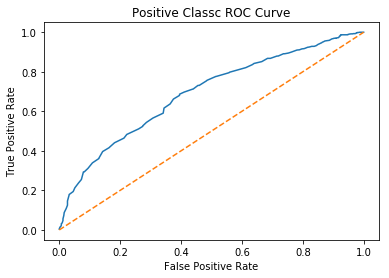

In [54]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Positive Classc ROC Curve');

#### ROC Score

In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
# area under ROC curver
roc_auc_score(y_1, predict_proba[:, 1])

0.6899830220713074

#### Precision/Recall

In [57]:
from sklearn.metrics import precision_recall_curve

In [58]:
# positive precision at 0.5 threshold
TP / (TP + FP)

0.6506410256410257

In [59]:
# positive recall at 0.5 threshold
TP / (TP + FN)

0.712280701754386

In [60]:
# positive class precision, recall for range of thresholds
pre, rec, thresh = precision_recall_curve(y_1, predict_proba[:, 1])

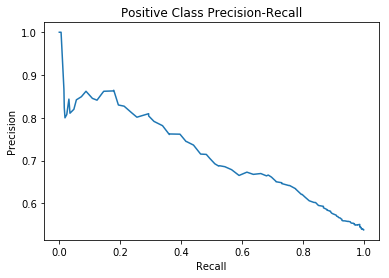

In [61]:
plt.plot(rec, pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Positive Class Precision-Recall');

#### Precision/Recall Score

In [62]:
from sklearn.metrics import auc

In [63]:
# area under precision-recall curve
auc(rec, pre)

0.7167887212192374

## Model: Single Class, Two-Feature

In [64]:
# create instance of model
log_reg = LogisticRegression()

In [65]:
# fit model on training data
log_reg.fit(X_2, y_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model Coefficients

In [66]:
# output model coefficients
log_reg.coef_

array([[-3.49407443,  0.75095875]])

In [67]:
# output model intercept
log_reg.intercept_

array([-5.75577085])

In [68]:
# output model classes
log_reg.classes_

array([0, 1])

In [69]:
# features
X_2.columns

Index(['volatile acidity', 'alcohol'], dtype='object')

In [70]:
coefs = [log_reg.intercept_[0], log_reg.coef_[0][0], log_reg.coef_[0][1]]

In [71]:
feats = ['intercept', X_2.columns[0], X_2.columns[1]]

In [72]:
pd.DataFrame(coefs, index=feats, columns=['Model Coefficients'])

,Model Coefficients
intercept,-5.755771
volatile acidity,-3.494074
alcohol,0.750959


### Model Equation

In [73]:
print('Regression Model Equation')
print('-'*80)
print(f'y = {round(log_reg.coef_[0][0], 4)}*{X_2.columns[0]} \
+ {round(log_reg.coef_[0][1], 4)}*{X_2.columns[1]} \
+ {round(log_reg.intercept_[0], 2)}')
print('-'*80)

Regression Model Equation
--------------------------------------------------------------------------------
y = -3.4941*volatile acidity + 0.751*alcohol + -5.76
--------------------------------------------------------------------------------


### Model Visualization

In [74]:
# calculate model values with logistic equation
x1_lim = np.linspace(min(X_2.iloc[:, 0]), max(X_2.iloc[:, 0]), 10)
x2_lim = np.linspace(min(X_2.iloc[:, 1]), max(X_2.iloc[:, 1]), 10)
X1, X2 = np.meshgrid(x1_lim, x2_lim)
Y = 1 / (1 + np.exp(-(log_reg.coef_[0][0]*X1 + log_reg.coef_[0][1]*X2 + log_reg.intercept_[0])))

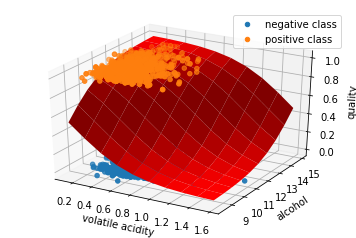

In [82]:
# uncomment for interactivity:
# %matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df_2.columns[-1])

ax.scatter3D(X_2.iloc[y_2[y_2 == 0].index, 0], X_2.iloc[y_2[y_2 == 0].index, 1], 
             y_2[y_2== 0], label='negative class')
ax.scatter3D(X_2.iloc[y_2[y_2 == 1].index, 0], X_2.iloc[y_2[y_2 == 1].index, 1], 
             y_2[y_2== 1], label='positive class')
ax.plot_surface(X1, X2, Y, color='red')
ax.legend();

### Model Predictions

In [83]:
# predict class based on feature input
predictions = log_reg.predict(X_2)
predictions

array([0, 0, 0, ..., 1, 0, 1])

In [84]:
# predict probabilities of each class based on feature input
predict_proba = log_reg.predict_proba(X_2)
predict_proba

array([[0.75815864, 0.24184136],
       [0.81323372, 0.18676628],
       [0.74113414, 0.25886586],
       ...,
       [0.32677725, 0.67322275],
       [0.58653745, 0.41346255],
       [0.19440894, 0.80559106]])

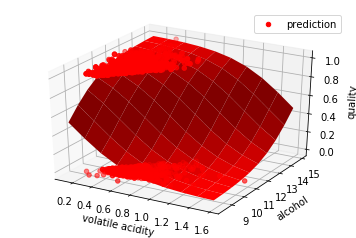

In [94]:
# uncomment for interactivity:
# %matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df_2.columns[-1])

ax.scatter3D(X_2.iloc[:, 0], X_2.iloc[:, 1], predictions, color='red', label='prediction')
ax.plot_surface(X1, X2, Y, color='red')
ax.legend();

### Model Evaluation

In [43]:
from sklearn import metrics

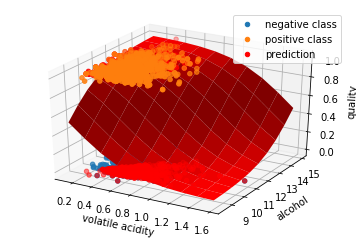

In [95]:
# uncomment for interactivity:
# %matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df_2.columns[-1])

ax.scatter3D(X_2.iloc[y_2[y_2 == 0].index, 0], X_2.iloc[y_2[y_2 == 0].index, 1], 
             y_2[y_2== 0], label='negative class')
ax.scatter3D(X_2.iloc[y_2[y_2 == 1].index, 0], X_2.iloc[y_2[y_2 == 1].index, 1], 
             y_2[y_2== 1], label='positive class')
ax.scatter3D(X_2.iloc[:, 0], X_2.iloc[:, 1], predictions, color='red', label='prediction')
ax.plot_surface(X1, X2, Y, color='red')
ax.legend();

In [93]:
%matplotlib inline

#### Overall Accuracy

In [87]:
sum(predictions == y_2) / len(y_2)

0.7323327079424641

In [88]:
log_reg.score(X_2, y_2)

0.7323327079424641

#### Confusion Matrix

In [89]:
# true negatives
TN = sum((y_2 == 0) & (predictions == 0))
TN

541

In [90]:
# false positives
FP = sum((y_2 == 0) & (predictions == 1))
FP

203

In [91]:
# false negatives
FN = sum((y_2 == 1) & (predictions == 0))
FN

225

In [92]:
# true positives
TP = sum((y_2 == 1) & (predictions == 1))
TP

630

In [93]:
metrics.confusion_matrix(y_2, predictions)

array([[541, 203],
       [225, 630]])

#### Precision/Recall

In [94]:
# negative precision
TN / (TN + FN)

0.706266318537859

In [95]:
# negative recall
TN / (TN + FP)

0.7271505376344086

In [96]:
# positive precision
TP / (TP + FP)

0.7563025210084033

In [97]:
# positive recall
TP / (TP + FN)

0.7368421052631579

In [98]:
print(metrics.classification_report(y_2, predictions))

             precision    recall  f1-score   support

          0       0.71      0.73      0.72       744
          1       0.76      0.74      0.75       855

avg / total       0.73      0.73      0.73      1599



#### Receiver Operating Characteristic (ROC)

In [71]:
from sklearn.metrics import roc_curve

In [99]:
# false positive rate at 0.5 threshold
FP / (TP + FN)

0.23742690058479532

In [100]:
# true positive rate at 0.5 threshold
TP / (TP + FN)

0.7368421052631579

In [101]:
# positive class ROC values for range of probability thresholds
fpr, tpr, thresh = roc_curve(y_2, predict_proba[:, 1])

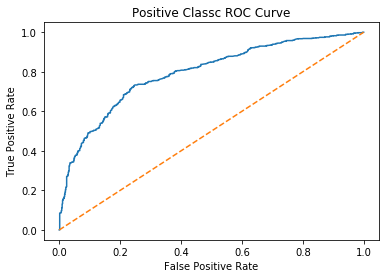

In [102]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Positive Classc ROC Curve');

#### ROC Score

In [87]:
from sklearn.metrics import roc_auc_score

In [103]:
# area under ROC curver
roc_auc_score(y_1, predict_proba[:, 1])

0.7929352952273157

#### Precision/Recall

In [113]:
from sklearn.metrics import precision_recall_curve

In [104]:
# positive precision at 0.5 threshold
TP / (TP + FP)

0.7563025210084033

In [105]:
# positive recall at 0.5 threshold
TP / (TP + FN)

0.7368421052631579

In [106]:
# positive class precision, recall for range of thresholds
pre, rec, thresh = precision_recall_curve(y_2, predict_proba[:, 1])

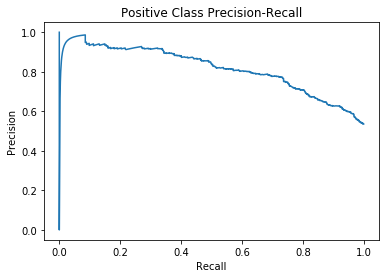

In [107]:
plt.plot(rec, pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Positive Class Precision-Recall');

#### Precision/Recall Score

In [124]:
from sklearn.metrics import auc

In [108]:
# area under precision-recall curve
auc(rec, pre)

0.8157162625428398

# Modeling <a name="model"></a>

## Train/Test Split <a name="tt_splt"></a>
Split data into feature training, feature test, target training and target test variables

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# specify test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [98]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
140,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6
1232,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5
720,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7
39,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5


In [99]:
y_train.head()

140     5
1232    5
720     5
77      6
39      5
Name: quality, dtype: int64

In [100]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4


In [101]:
y_test.head()

1109    6
1032    5
1002    7
487     6
979     5
Name: quality, dtype: int64

## Initial Model

In [102]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# create instance of linear regression model
log_reg = LogisticRegression()

In [ ]:
# fit model on training data
log_reg.fit(X_train, y_train)

In [115]:
log_reg.score(X, y)

0.6416510318949343

In [108]:
log_reg_pred = log_reg.predict(X_test)

In [110]:
metrics.confusion_matrix(y_test, log_reg_pred)

array([[102,  83],
       [ 59, 156]])

In [109]:
print(metrics.classification_report(y_test, log_reg_pred))

             precision    recall  f1-score   support

          0       0.63      0.55      0.59       185
          1       0.65      0.73      0.69       215

avg / total       0.64      0.65      0.64       400



### Evaluate

In [89]:
# assign model class predictions
log_reg_pred = log_reg.predict(X_test)
# first five predictions
log_reg_pred[:5]

array([1, 0, 1, 0, 1])

In [90]:
from sklearn import metrics

In [91]:
print(metrics.classification_report(y_test, log_reg_pred))

             precision    recall  f1-score   support

          0       0.63      0.55      0.59       185
          1       0.65      0.73      0.69       215

avg / total       0.64      0.65      0.64       400



In [92]:
metrics.confusion_matrix(y_test, log_reg_pred)

array([[102,  83],
       [ 59, 156]])

## Scaling

In [25]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [27]:
log_reg_pipe = Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('model', LogisticRegression())
])

In [29]:
log_reg_pipe.fit(X_train, y_train)
log_reg_pipe_pred = log_reg_pipe.predict(X_test)

In [30]:
print(metrics.classification_report(y_test, log_reg_pipe_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        14
          5       0.67      0.80      0.73       169
          6       0.60      0.61      0.60       170
          7       0.36      0.25      0.29        40
          8       0.00      0.00      0.00         5

avg / total       0.58      0.62      0.59       400



/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
metrics.confusion_matrix(y_test, log_reg_pipe_pred)

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   9,   4,   1,   0],
       [  0,   0, 135,  34,   0,   0],
       [  0,   0,  52, 103,  15,   0],
       [  0,   0,   3,  27,  10,   0],
       [  0,   0,   0,   3,   2,   0]])

## sklearn

In [ ]:


# model pipeline

# model

# tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# evaluation

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score